In [23]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from gan_synthesis.preprocessing.transforms import preprocess

preprocess()



FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\zzmir\\gan_synthesis\\proccessed_data\\seg_slice_1.npy'

In [27]:
def read_data(index, mode: str):
    image = np.load(fr"C:\Users\zzmir\gan_synthesis\processed_data\{mode}_slice_{index}.npy")
    return image

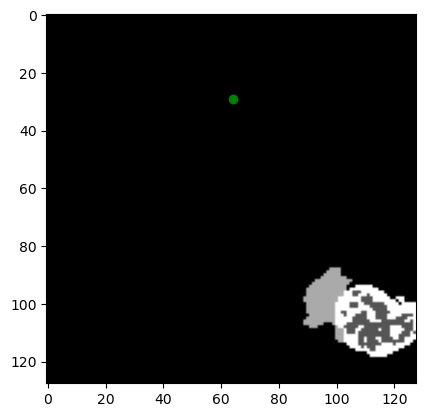

In [69]:
image = read_data(5, "seg")
plt.imshow(image, cmap="gray")
plt.plot(centerx, centery, "go")
plt.show()

In [64]:
def find_center(image):
    mask = image > 0
    firstx = np.where(np.any(mask, axis=0))[0][0] #uses binary masks and axis slicing to find the min and max index of x and y tumor labels
    lastx = np.where(np.any(mask, axis=0))[0][-1]
    firsty = np.where(np.any(mask, axis=1))[0][0]
    lasty = np.where(np.any(mask, axis=1))[0][-1]

    centerx = (firstx + lastx) // 2
    centery = (firsty + lasty) // 2

    return centerx, centery



In [67]:
def crop_tumor_center(image):
    centerx, centery = find_center(image)
    minx = centerx - 48
    maxx = minx + 97
    miny = centery - 48
    maxy = centery + 97
    image = image[minx:maxx, miny:maxy]
    return image

In [68]:
image = crop_tumor_center(5)

ValueError: Calling nonzero on 0d arrays is not allowed. Use np.atleast_1d(scalar).nonzero() instead. If the context of this error is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.

In [47]:
np.where(np.any(mask, axis=0))

(array([29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,
        46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62,
        63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
        80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96,
        97, 98, 99]),)

In [52]:
firstx, lastx

(np.int64(29), np.int64(99))

In [54]:
centerx = (firstx + lastx) // 2
centery = (firsty + lasty) // 2